In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/drive/MyDrive/태블로공유폴더/작업/아파트 상세정보   실거래가 데이터/세종시_아파트_매매_실거래가(2016.01.01~2021.05.25).csv")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data1 = data.copy()

## **반복매매법**

##### 반복매매모형은 거래가격과 거래시점 정보만을 이용하여 더미변수를 설명변수로 하는 선형회귀모형에 의해 지수를 추정하기 때문에, 다양한 주택특성 정보를 요구하는 특성가격모형에 비해 모형의 간결성과 요구되는 자료의 간편성이 큰 장점으로 꼽힌다

In [8]:
data2 = data1[["단지명","전용면적(㎡)","계약년월","거래금액(만원)"]]

In [9]:
data2.head()

,단지명,전용면적(㎡),계약년월,거래금액(만원)
0,가락마을 20단지(호반베르디움5차),84.9895,201601,"27,330"
1,가락마을 20단지(호반베르디움5차),84.9895,201602,"29,000"
2,가락마을 20단지(호반베르디움5차),84.9895,201603,"28,660"
3,가락마을 20단지(호반베르디움5차),84.9895,201604,"28,200"
4,가락마을 20단지(호반베르디움5차),84.9895,201605,"33,500"


In [13]:
data2["거래금액(만원)"] = data2["거래금액(만원)"].str.replace(",","").astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
data2["계약년월"].unique()

array([201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608,
       201609, 201610, 201611, 201612, 201704, 201705, 201706, 201707,
       201708, 201712, 201702, 201709, 201710, 201701, 201703, 201711,
       201801, 201803, 201804, 201806, 201807, 201808, 201809, 201810,
       201811, 201812, 201802, 201805, 201905, 201906, 201907, 201908,
       201909, 201911, 201912, 201901, 201902, 201903, 201904, 201910,
       202006, 202001, 202002, 202003, 202004, 202005, 202007, 202008,
       202009, 202011, 202012, 202010, 202101, 202102, 202103, 202104,
       202105])

In [14]:
data3 = data2.groupby(["단지명","전용면적(㎡)"]).nunique() #단지별, 전용면적별로 나온 횟수

In [15]:
data3

계약년월  거래금액(만원)
단지명               전용면적(㎡)                 
(주)금강사원임대아파트      32.3200      1         3
                  53.4600      1         3
SR파크센텀            17.8518      3         3
                  19.5794      4         5
                  20.1058      5         5
...                          ...       ...
호려울마을8단지(중흥 에코시티) 109.9693     9        19
호수의 아침            17.4250     13        12
                  17.8340     26        23
                  18.1680      5         5
                  19.9330     20        21

[899 rows x 2 columns]

In [16]:
index = data3[data3["계약년월"] != 1].index # index = 한번 이상 나온 거래

In [17]:
del_index = data3[data3["계약년월"] == 1].index # del_index = 한번만 나와서 삭제할 거래 

In [18]:
index # 중복거래의 단지명과 면적

MultiIndex([(           'SR파크센텀',  17.8518),
            (           'SR파크센텀',  19.5794),
            (           'SR파크센텀',  20.1058),
            (           'SR파크센텀',  20.1536),
            (           'SR파크센텀',  21.5812),
            (           'SR파크센텀',  23.4973),
            (        '가락마을 19단지',  59.6506),
            (        '가락마을 19단지',  84.6663),
            (        '가락마을 19단지',  84.6972),
            (        '가락마을 19단지',  84.9544),
            ...
            (   '호려울마을6단지(모아엘가)', 117.0336),
            (   '호려울마을6단지(모아엘가)', 118.4815),
            ('호려울마을8단지(중흥 에코시티)',  84.9895),
            ('호려울마을8단지(중흥 에코시티)',  84.9901),
            ('호려울마을8단지(중흥 에코시티)',  98.9982),
            ('호려울마을8단지(중흥 에코시티)', 109.9693),
            (           '호수의 아침',   17.425),
            (           '호수의 아침',   17.834),
            (           '호수의 아침',   18.168),
            (           '호수의 아침',   19.933)],
           names=['단지명', '전용면적(㎡)'], length=741)

In [19]:
del_index

MultiIndex([(     '(주)금강사원임대아파트',             32.32),
            (     '(주)금강사원임대아파트',             53.46),
            (           'SR파크센텀',           20.8816),
            (        '가락마을 19단지',           64.1716),
            (        '가락마을 19단지',           84.8632),
            (        '가락마을 19단지', 84.88600000000002),
            (         '가락마을 2단지',          107.6953),
            (         '가락마을 2단지',          111.3013),
            (         '가락마을 2단지',          111.3059),
            (         '가락마을 2단지',          113.1897),
            ...
            (         '해밀마을 2단지',             84.99),
            (         '해밀마을 2단지',            102.67),
            (         '해밀마을 2단지',            102.68),
            (         '해밀마을 2단지',             102.9),
            (        '호려울마을 7단지',          102.9145),
            (        '호려울마을 7단지',          102.9385),
            ('호려울마을10단지(중흥S클래스)',          169.0564),
            (         '호려울마을3단지', 59.96100000000001),
            

In [20]:
data4 = data2.groupby(["단지명","전용면적(㎡)","계약년월"]).mean()

In [21]:
data3["계약년월"] != 1

단지명                전용면적(㎡) 
(주)금강사원임대아파트       32.3200     False
                   53.4600     False
SR파크센텀             17.8518      True
                   19.5794      True
                   20.1058      True
                               ...  
호려울마을8단지(중흥 에코시티)  109.9693     True
호수의 아침             17.4250      True
                   17.8340      True
                   18.1680      True
                   19.9330      True
Name: 계약년월, Length: 899, dtype: bool

In [22]:
data4

거래금액(만원)
단지명          전용면적(㎡) 계약년월                
(주)금강사원임대아파트 32.3200 202012   3720.000000
             53.4600 202012   5776.851852
SR파크센텀       17.8518 202011   9850.000000
                     202103  12200.000000
                     202105  10500.000000
...                                   ...
호수의 아침       19.9330 202101  10700.000000
                     202102  12000.000000
                     202103  11300.000000
                     202104  10833.333333
                     202105  11500.000000

[12763 rows x 1 columns]

In [23]:
data5 = data4[data3["계약년월"] != 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [24]:
data5 = pd.DataFrame(index=data4.index)

In [25]:
data5

Empty DataFrame
Columns: []
Index: [((주)금강사원임대아파트, 32.32, 202012), ((주)금강사원임대아파트, 53.46, 202012), (SR파크센텀, 17.8518, 202011), (SR파크센텀, 17.8518, 202103), (SR파크센텀, 17.8518, 202105), (SR파크센텀, 19.5794, 202008), (SR파크센텀, 19.5794, 202011), (SR파크센텀, 19.5794, 202103), (SR파크센텀, 19.5794, 202104), (SR파크센텀, 20.1058, 202007), (SR파크센텀, 20.1058, 202009), (SR파크센텀, 20.1058, 202101), (SR파크센텀, 20.1058, 202103), (SR파크센텀, 20.1058, 202105), (SR파크센텀, 20.1536, 202102), (SR파크센텀, 20.1536, 202103), (SR파크센텀, 20.8816, 202103), (SR파크센텀, 21.5812, 202009), (SR파크센텀, 21.5812, 202102), (SR파크센텀, 23.4973, 202005), (SR파크센텀, 23.4973, 202101), (가락마을 19단지, 59.6506, 201906), (가락마을 19단지, 59.6506, 201908), (가락마을 19단지, 59.6506, 201911), (가락마을 19단지, 59.6506, 201912), (가락마을 19단지, 59.6506, 202002), (가락마을 19단지, 59.6506, 202003), (가락마을 19단지, 59.6506, 202007), (가락마을 19단지, 59.6506, 202008), (가락마을 19단지, 59.6506, 202011), (가락마을 19단지, 59.6506, 202012), (가락마을 19단지, 59.6506, 202101), (가락마을 19단지, 59.6506, 202102), (가락마을 19단지, 59.6506, 202103), (가락마을 19단지, 59.6506, 202104), (가락마을 19단지, 59.6506, 202105), (가락마을 19단지, 64.1716, 202002), (가락마을 19단지, 84.6663, 201907), (가락마을 19단지, 84.6663, 202007), (가락마을 19단지, 84.6663, 202009), (가락마을 19단지, 84.6972, 201912), (가락마을 19단지, 84.6972, 202007), (가락마을 19단지, 84.8632, 201912), (가락마을 19단지, 84.88600000000002, 202006), (가락마을 19단지, 84.9544, 201905), (가락마을 19단지, 84.9544, 201906), (가락마을 19단지, 84.9544, 201907), (가락마을 19단지, 84.9544, 201911), (가락마을 19단지, 84.9544, 201912), (가락마을 19단지, 84.9544, 202001), (가락마을 19단지, 84.9544, 202002), (가락마을 19단지, 84.9544, 202003), (가락마을 19단지, 84.9544, 202005), (가락마을 19단지, 84.9544, 202006), (가락마을 19단지, 84.9544, 202007), (가락마을 19단지, 84.9544, 202008), (가락마을 19단지, 105.6138, 201905), (가락마을 19단지, 105.6138, 201906), (가락마을 19단지, 105.6138, 201908), (가락마을 19단지, 105.6138, 201909), (가락마을 19단지, 105.6138, 201911), (가락마을 19단지, 105.6138, 201912), (가락마을 19단지, 105.6138, 202004), (가락마을 19단지, 105.6138, 202006), (가락마을 19단지, 105.6138, 202008), (가락마을 19단지, 105.6138, 202011), (가락마을 19단지, 105.6138, 202012), (가락마을 19단지, 105.6138, 202103), (가락마을 19단지, 105.7788, 201908), (가락마을 19단지, 105.7788, 201912), (가락마을 19단지, 105.7788, 202008), (가락마을 19단지, 105.7788, 202105), (가락마을 19단지, 125.0123, 201906), (가락마을 19단지, 125.0123, 201907), (가락마을 20단지(호반베르디움5차), 59.8338, 201608), (가락마을 20단지(호반베르디움5차), 59.8338, 201706), (가락마을 20단지(호반베르디움5차), 59.8338, 201712), (가락마을 20단지(호반베르디움5차), 59.8338, 201801), (가락마을 20단지(호반베르디움5차), 59.8338, 201804), (가락마을 20단지(호반베르디움5차), 59.8338, 201809), (가락마을 20단지(호반베르디움5차), 59.8338, 201811), (가락마을 20단지(호반베르디움5차), 59.8338, 201907), (가락마을 20단지(호반베르디움5차), 59.8338, 201908), (가락마을 20단지(호반베르디움5차), 59.8338, 201912), (가락마을 20단지(호반베르디움5차), 59.8338, 202001), (가락마을 20단지(호반베르디움5차), 59.8338, 202002), (가락마을 20단지(호반베르디움5차), 59.8338, 202005), (가락마을 20단지(호반베르디움5차), 59.8338, 202006), (가락마을 20단지(호반베르디움5차), 59.8338, 202007), (가락마을 20단지(호반베르디움5차), 59.8338, 202008), (가락마을 20단지(호반베르디움5차), 59.8338, 202009), (가락마을 20단지(호반베르디움5차), 59.8338, 202012), (가락마을 20단지(호반베르디움5차), 59.8338, 202101), (가락마을 20단지(호반베르디움5차), 59.8338, 202102), (가락마을 20단지(호반베르디움5차), 59.8338, 202104), (가락마을 20단지(호반베르디움5차), 59.9897, 201612), (가락마을 20단지(호반베르디움5차), 59.9897, 201704), (가락마을 20단지(호반베르디움5차), 59.9897, 201706), (가락마을 20단지(호반베르디움5차), 59.9897, 201707), (가락마을 20단지(호반베르디움5차), 59.9897, 201801), ...]

[12763 rows x 0 columns]

In [26]:
X = np.zeros([10878,59])
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
data5.loc[("SR파크센텀",19.5794)].index

Int64Index([202008, 202011, 202103, 202104], dtype='int64', name='계약년월')

In [28]:
col_dict = {201602 : 0,
201603 : 1,
201604 : 2,
201605 : 3,
201606 : 4,
201607 : 5,
201608 : 6,
201609 : 7,
201610 : 8,
201611 : 9,
201612 : 10,
201701 : 11,
201702 : 12,
201703 : 13,
201704 : 14,
201705 : 15,
201706 : 16,
201707 : 17,
201708 : 18,
201709 : 19,
201710 : 20,
201711 : 21,
201712 : 22,
201801 : 23,
201802 : 24,
201803 : 25,
201804 : 26,
201805 : 27,
201806 : 28,
201807 : 29,
201808 : 30,
201809 : 31,
201810 : 32,
201811 : 33,
201812 : 34,
201901 : 35,
201902 : 36,
201903 : 37,
201904 : 38,
201905 : 39,
201906 : 40,
201907 : 41,
201908 : 42,
201909 : 43,
201910 : 44,
201911 : 45,
201912 : 46,
202001 : 47,
202002 : 48,
202003 : 49,
202004 : 50,
202005 : 51,
202006 : 52,
202007 : 53,
202008 : 54,
202009 : 55,
202010 : 56,
202011 : 57,
202012 : 58,
202101 : 59,
202102 : 60,
202103 : 61,
202104 : 62,
202105 : 63}

In [29]:
y = 2016
m = 2
for i in range(64):
  print(str(y) + str(m) + " : " + str(i) + ",")
  m += 1
  if(m==13):
    m = 1
    y += 1

20162 : 0,
20163 : 1,
20164 : 2,
20165 : 3,
20166 : 4,
20167 : 5,
20168 : 6,
20169 : 7,
201610 : 8,
201611 : 9,
201612 : 10,
20171 : 11,
20172 : 12,
20173 : 13,
20174 : 14,
20175 : 15,
20176 : 16,
20177 : 17,
20178 : 18,
20179 : 19,
201710 : 20,
201711 : 21,
201712 : 22,
20181 : 23,
20182 : 24,
20183 : 25,
20184 : 26,
20185 : 27,
20186 : 28,
20187 : 29,
20188 : 30,
20189 : 31,
201810 : 32,
201811 : 33,
201812 : 34,
20191 : 35,
20192 : 36,
20193 : 37,
20194 : 38,
20195 : 39,
20196 : 40,
20197 : 41,
20198 : 42,
20199 : 43,
201910 : 44,
201911 : 45,
201912 : 46,
20201 : 47,
20202 : 48,
20203 : 49,
20204 : 50,
20205 : 51,
20206 : 52,
20207 : 53,
20208 : 54,
20209 : 55,
202010 : 56,
202011 : 57,
202012 : 58,
20211 : 59,
20212 : 60,
20213 : 61,
20214 : 62,
20215 : 63,


In [30]:
index

MultiIndex([(           'SR파크센텀',  17.8518),
            (           'SR파크센텀',  19.5794),
            (           'SR파크센텀',  20.1058),
            (           'SR파크센텀',  20.1536),
            (           'SR파크센텀',  21.5812),
            (           'SR파크센텀',  23.4973),
            (        '가락마을 19단지',  59.6506),
            (        '가락마을 19단지',  84.6663),
            (        '가락마을 19단지',  84.6972),
            (        '가락마을 19단지',  84.9544),
            ...
            (   '호려울마을6단지(모아엘가)', 117.0336),
            (   '호려울마을6단지(모아엘가)', 118.4815),
            ('호려울마을8단지(중흥 에코시티)',  84.9895),
            ('호려울마을8단지(중흥 에코시티)',  84.9901),
            ('호려울마을8단지(중흥 에코시티)',  98.9982),
            ('호려울마을8단지(중흥 에코시티)', 109.9693),
            (           '호수의 아침',   17.425),
            (           '호수의 아침',   17.834),
            (           '호수의 아침',   18.168),
            (           '호수의 아침',   19.933)],
           names=['단지명', '전용면적(㎡)'], length=741)

In [31]:
col_dict[data5.loc[(             'SR파크센텀',  19.5794)].index[1]]

57

In [32]:
data7 = data4.drop(index=del_index)
data7

거래금액(만원)
단지명    전용면적(㎡) 계약년월                
SR파크센텀 17.8518 202011   9850.000000
               202103  12200.000000
               202105  10500.000000
       19.5794 202008   8600.000000
               202011   9950.000000
...                             ...
호수의 아침 19.9330 202101  10700.000000
               202102  12000.000000
               202103  11300.000000
               202104  10833.333333
               202105  11500.000000

[12605 rows x 1 columns]

In [33]:
# 반복매매지수 추정을 위한 행렬 X, Y 정의
X = np.zeros([11864,64])
Y = []
cnt = 0
for idx in index:
  for l_idx in range(len(data7.loc[idx].index) - 1) :
    if(data7.loc[idx].index[l_idx] != 201601):
      X[cnt][col_dict[data7.loc[idx].index[l_idx]]] = -1
    X[cnt][col_dict[data7.loc[idx].index[l_idx + 1]]] = 1
    Y.append(np.log(data7.loc[idx + (data7.loc[idx].index[l_idx + 1],)]["거래금액(만원)"] / data7.loc[idx + (data7.loc[idx].index[l_idx],)]["거래금액(만원)"]))

    cnt += 1
cnt

11864

### **반복매매지수를 최소제곱법으로 추정**

##### 코드에서 X는 아래 식에서 D, Y는 r 행렬에 해당한다

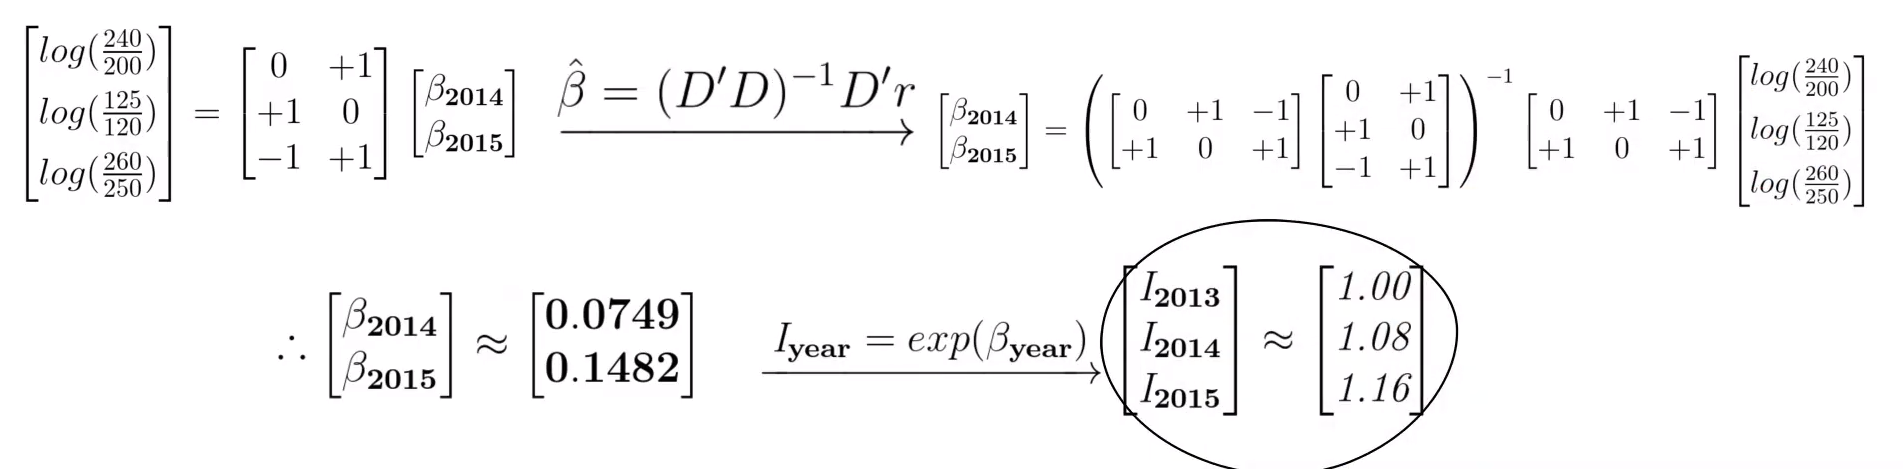

In [34]:
len(X)

11864

In [35]:
len(Y)

11864

In [36]:
X

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ..., -1.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0., -1.,  1.]])

In [37]:
# 반복매매지수 추정 
a = (np.linalg.inv(np.transpose(X) @ X) @ np.transpose(X))
jisu = a @ Y

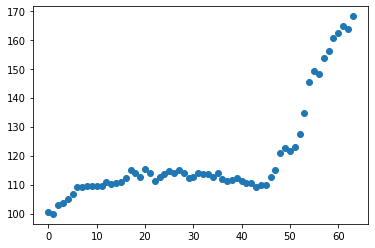

In [38]:
# 2016년 1월 기준(100) 2020년 12월까지의 지수
plt.scatter(x=range(len(jisu)), y=np.exp(jisu)*100)

In [39]:
j = np.append(np.array([1]),np.exp(jisu))

In [40]:
len(j)

65

In [41]:
len(data2["계약년월"].unique())

65

In [46]:
exp_data = pd.DataFrame(columns=["계약년월","반복매매지수"],
             data={"계약년월":data2["계약년월"].unique(),"반복매매지수":j})

In [47]:
exp_data.to_csv("/content/drive/MyDrive/태블로공유폴더/작업/아파트 상세정보   실거래가 데이터/반복매매지수.csv", index = False)